# dependecies

In [2]:
from glob import glob
import math

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

import digscannerlib as dsl

# read

## image list

In [3]:
img_input_list = glob('C:/Users/Matteo/Desktop/scans/*.JPG')

## load with opencv

In [93]:
img = cv.imread(img_input_list[2], cv.IMREAD_UNCHANGED)
# img = cv.resize(img, (900, 600))

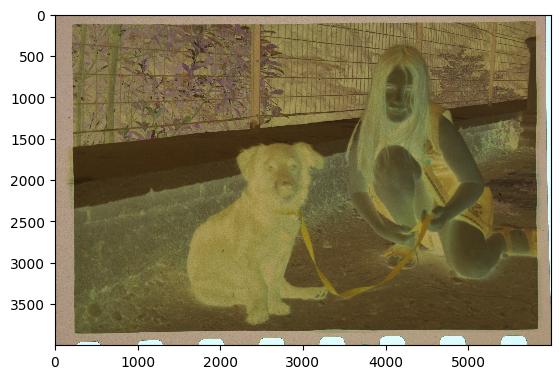

In [94]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

# border detection

In [95]:
start_px = dsl.get_start_px(img=img, crop_perc=0.05)
start_px

{'top': 116, 'bottom': 3827, 'left': 231, 'right': 5821}

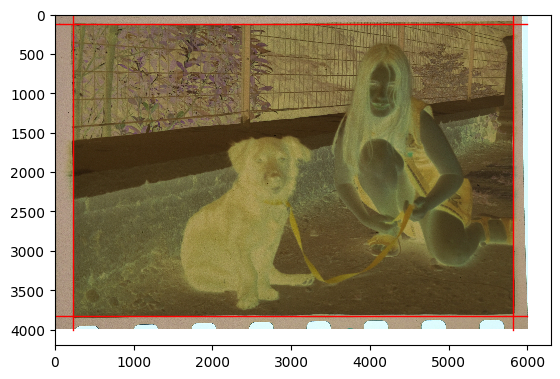

In [96]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), interpolation='nearest')

for side, start in start_px.items():
    if side in ['top', 'bottom']:
        plt.plot([0, img.shape[1]], [start, start], color='red', linestyle='-', linewidth=1)
    else:
        plt.plot([start, start], [0, img.shape[0]], color='red', linestyle='-', linewidth=1)
        
plt.show()

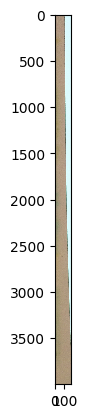

In [97]:
plt.imshow(cv.cvtColor(img[:,start_px['right']:], cv.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

In [98]:
b_top, g_top, r_top = cv.split(img[:start_px['top']])
b_bottom, g_bottom, r_bottom = cv.split(img[start_px['bottom']:])
b_left, g_left, r_left = cv.split(img[:,:start_px['left']])
b_right, g_right, r_right = cv.split(img[:,start_px['right']:])

In [99]:
b = np.concatenate((b_top, b_bottom, b_right, b_left), axis=None)
g = np.concatenate((g_top, g_bottom, g_right, g_left), axis=None)
r = np.concatenate((r_top, r_bottom, r_right, r_left), axis=None)

In [100]:
b_median = np.percentile(b, q=50)
g_median = np.percentile(g, q=50)
r_median = np.percentile(r, q=50)

In [101]:
img_b, img_g, img_r = cv.split(img)
img_b = img_b * (1 / b_median)
img_g = img_g * (1 / g_median)
img_r = img_r * (1 / r_median)
img_wb = cv.merge((img_b, img_g, img_r))
img_wb_pos = 1 - img_wb
img_out = (np.clip(img_wb_pos, 0, 1) * np.iinfo(np.uint8).max).astype(np.uint8)
img_out2 = (np.clip(img_wb, 0, 1) * np.iinfo(np.uint8).max).astype(np.uint8)

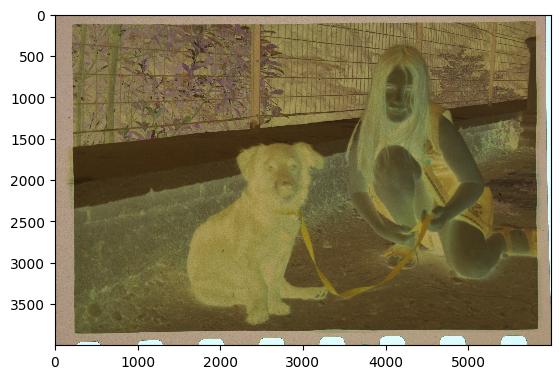

In [102]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

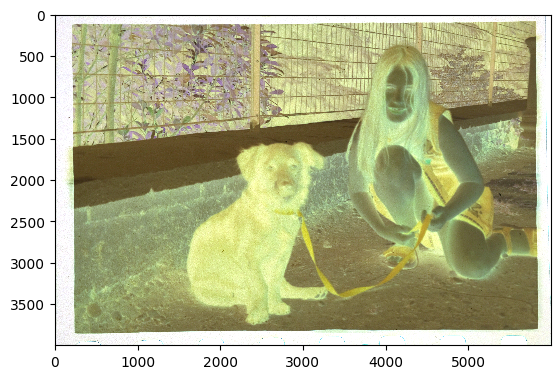

In [103]:
plt.imshow(cv.cvtColor(img_out2, cv.COLOR_BGR2RGB), interpolation='nearest')
plt.show()

In [105]:
cv.imwrite(
    'C:/Users/Matteo/Desktop/scans/test_out.JPG',
    img_out
)

True

esempio rotazione

center = (width/2, height/2)
angle = math.atan(m)
scale = 1.0
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(img, M, (width, height))